In [9]:
import os, sys
import numpy as np
import torch
from PIL import Image
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage, ToTensor, Pad
sys.path.append('/home/ysig/nicolas/learnable-typewriter-supervised')
from learnable_typewriter.utils.loading import load_pretrained_model
from learnable_typewriter.evaluate.qualitative.decompositor import Decompositor
from learnable_typewriter.evaluate.quantitative.sprite_matching.evaluate import inference 
from learnable_typewriter.evaluate.quantitative.sprite_matching.metrics import error_rate 
from learnable_typewriter.data.dataloader import collate_fn_pad_to_max
from IPython.display import display
import joblib

In [10]:
%env CUDA_VISIBLE_DEVICES=""

env: CUDA_VISIBLE_DEVICES=""


In [11]:
SUP = '/home/ysig/nicolas/learnable-typewriter-supervised/golden-experiments/copiale-sup-1.5-0.01'
# UNSUP = '/home/ysig/nicolas/learnable-typewriter-supervised/golden-experiments/unsup-copiale'
# trascribe_unsupervised = joblib.load('/home/ysig/nicolas/learnable-typewriter-supervised/golden-experiments/unsup-copiale/er_mapping.pkl')
UNSUP = '/home/ysig/nicolas/learnable-typewriter-supervised/ablating-copiale-unsup-2/color/baseline/2022-11-11_22-35-32/'
trascribe_unsupervised = {0: 'z', 1: 'eh', 2: 'n.', 3: 'y..', 4: 'oh', 5: 'r.', 6: 'lam', 7: 'hd', 8: 'r.', 9: 'm', 10: 'c.', 11: 'inf', 12: 'uu', 13: 'c.', 14: 'iot', 15: '"', 16: '.', 17: 'grr', 18: 'nee', 19: 'nee', 20: 'n', 21: 'm.', 22: 'p', 23: 'uh', 24: 'ds', 25: 'tri', 26: 'bar', 27: 'mal', 28: 'grc', 29: 'nee', 30: 'ns', 31: 'b', 32: 'pi', 33: 'N', 34: 'v', 35: 'gs', 36: 'zs', 37: 'v', 38: 'iot', 39: 'grc', 40: 'p.', 41: '"', 42: 'k', 43: 'inf', 44: 'hd', 45: 'bar', 46: 'mu', 47: 'zs', 48: 'p', 49: 'B', 50: 'r.', 51: 'i', 52: 'u', 53: 'pi', 54: 'm.', 55: 'arr', 56: 'oh', 57: 'uu', 58: 'grr', 59: 'tri', 60: 'v', 61: 'uu', 62: 'n', 63: 's.', 64: 'b', 65: 'longs', 66: 'sqp', 67: ':', 68: 'c', 69: 'mal', 70: 'j', 71: 'bas', 72: 'l', 73: 'bar', 74: 'ni', 75: 'fem', 76: 'iot', 77: 'j', 78: 'ni', 79: 'nu', 80: 'oh', 81: 'del', 82: 'zzz', 83: 'sqi', 84: 'del', 85: 'ih', 86: 'zs', 87: 'ds', 88: 'g', 89: 'm', 90: 'l', 91: 'h.', 92: 'v', 93: 'iot', 94: 'f', 95: 'gam', 96: 'v', 97: '"', 98: 'zs', 99: 'x.', 100: 'three', 101: '"', 102: 'uu', 103: 'sqi', 104: 'r.', 105: 'ki', 106: 'zzz', 107: 'ns', 108: 'plus', 109: 'uh', 110: 'uh', 111: 'grl', 112: '"', 113: 'sqp', 114: 'lam', 115: 'ru', 116: 'ns', 117: 'iot', 118: 'ni', 119: 'gs'}

# UNSUP = '/home/ysig/nicolas/learnable-typewriter-supervised/ablating-copiale-unsup-2/color/baseline-without-blank-pen/2022-11-11_21-14-08/'
# trascribe_unsupervised = {0: 'c.', 1: 'eh', 2: 'm.', 3: 'uu', 4: 'mal', 5: 'M', 6: 'uu', 7: 'x.', 8: 'ki', 9: 'zzz', 10: 'z', 11: 'plus', 12: 'uh', 13: 'm', 14: 'm.', 15: 'tri', 16: 'p.', 17: 'grl', 18: 'r.', 19: 'zzz', 20: 'iot', 21: 'sqi', 22: 'arr', 23: 'del', 24: 'star', 25: 'pi', 26: 'lam', 27: 'y..', 28: 'arr', 29: 'ki', 30: 'k', 31: '"', 32: 'gam', 33: 'R', 34: 'zzz', 35: 'n', 36: 'fem', 37: 'lam', 38: 'f', 39: 'ns', 40: 'ru', 41: 'del', 42: 'lam', 43: 'uu', 44: 'grr', 45: 'grc', 46: 's.', 47: 'nee', 48: 'lam', 49: 'L', 50: 'nee', 51: 'uu', 52: 'tri', 53: 'b', 54: 'lam', 55: 'ds', 56: 'h', 57: 'iot', 58: ':', 59: 'zzz', 60: 'm', 61: 'ns', 62: 'pi', 63: 'sqp', 64: 'R', 65: 'bas', 66: 'v', 67: 'ih', 68: 'three', 69: 'p', 70: 'j', 71: 'no', 72: 'c.', 73: 'g', 74: 'del', 75: 'm.', 76: 'r.', 77: 'v', 78: 'p.', 79: 'b', 80: 'ru', 81: 'n.', 82: 'oh', 83: 'b', 84: 'r.', 85: 'r.', 86: 'zzz', 87: 'nee', 88: 'h.', 89: ':', 90: 'inf', 91: 'bar', 92: 'n', 93: 'b', 94: 'oh', 95: 'bas', 96: 'r.', 97: 'arr', 98: 'hd', 99: 'tri', 100: 'zs', 101: 'grr', 102: 'b', 103: 'hd', 104: 'grl', 105: 'arr', 106: 'ih', 107: 'gs', 108: 'iot', 109: 'c.', 110: '.', 111: 'j', 112: 'j', 113: 'oh', 114: 'y..', 115: 'zzz', 116: 'y..', 117: 'p', 118: 'ni', 119: 'ih'}

In [12]:
def plot_sprites(trainer, n_row=4):
    trainer.model
    masks = 1-trainer.model.sprites.masks
    
    if trainer.unsupervised:
        order = range(len(trainer.model.sprites))
        order = sorted(order, key=lambda k: trascribe_unsupervised[k])
        masks = torch.cat([masks[i].unsqueeze(0) for i in order], dim=0)
    else:
        order = list(range(4)) + list(range(22, len(trainer.model.sprites))) + list(range(4, 22))
        masks = torch.cat([masks[i].unsqueeze(0) for i in order], dim=0)
        
    return ToPILImage()(make_grid(masks, nrow=len(trainer.model.sprites)//n_row, padding_value=1, padding=2))

def seg(trainer, test_idx):
    trainer.__init_decompositor__()
    topil = ToPILImage()
    dataset = trainer.test_loader[0].dataset
    x = collate_fn_pad_to_max([dataset[test_idx]], supervised=True)
    obj = trainer.decompositor(x)
    gt = topil(x['x'].cpu()[0])
    return gt, topil(obj['reconstruction'].cpu()[0]), topil(obj['segmentation'].cpu()[0])

In [13]:
def resize_w(img, w):
    img = img.convert('RGB')
    wpercent = (w/float(img.size[0]))
    h = int((float(img.size[1])*float(wpercent)))
    img = img.resize((w, h), Image.Resampling.LANCZOS)
    return img

def add_pad_h(img, pad):
    pad = Pad([0, 0, 0, pad], fill=255, padding_mode='constant')
    return pad(img)

def assort(imgs):
    totensor = ToTensor()
    topil = ToPILImage()
    grid = torch.cat([totensor(img) for img in imgs], dim=1)
    return topil(grid)

def teaser(trainer, test_idx=0, place=['gt', 'sgm', 'sprites'], pad_h=[3, 3, 0], n_row=4):
    sprites = plot_sprites(trainer, n_row=n_row)
    gt, rec, sgm = seg(trainer, test_idx)
    figs = {'sprites': sprites, 'gt': gt, 'rec': rec, 'sgm': sgm}
    native_w = gt.size[0]
    figs['sprites'] = resize_w(figs['sprites'], native_w)
    return assort([add_pad_h(figs[p], h) for p, h in zip(place, pad_h)])

In [14]:
trainer = load_pretrained_model(path=SUP, device=None)

{'color': {'path': 'copiale/color', 'sep': ' ', 'space': '_', 'supervised': True}}
Generator is MLP
Selection init with dim_enc=64, dim_sprites=2304 --> dim_z=64
{'lr': 0.0001, 'weight_decay': 0}
Selection(
  (linear): Sequential(
    (0): Linear(in_features=2304, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
  (anchors): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
)


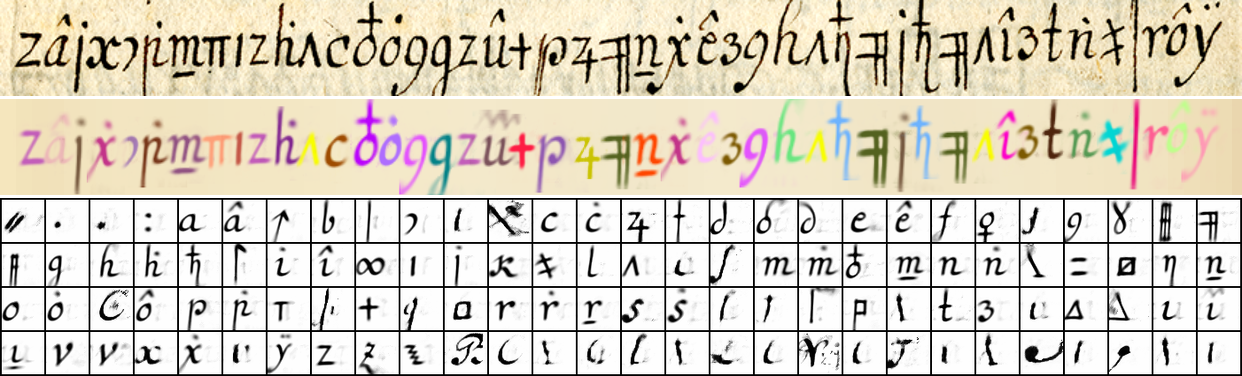

In [15]:
display(teaser(trainer, 3))

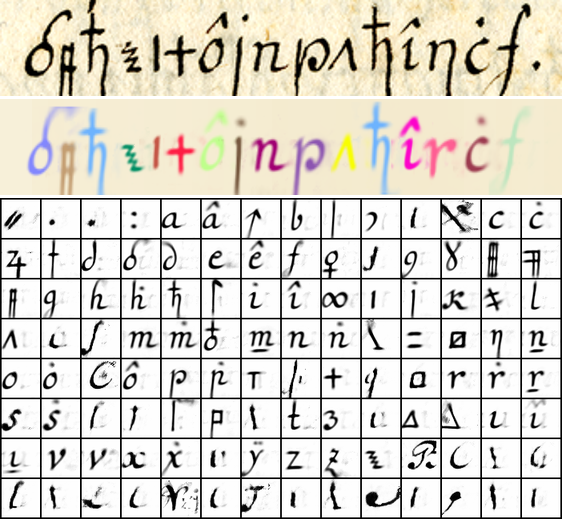

In [16]:
display(teaser(trainer, 10, n_row=8))

{'color': {'path': 'copiale/color', 'sep': ' ', 'space': '_', 'supervised': False, 'crop_width': 192}}
Generator is UNET
Selection init with dim_enc=64, dim_sprites=2304 --> dim_z=64
{'lr': 0.0001, 'weight_decay': 0}
Selection(
  (linear): Sequential(
    (0): Linear(in_features=2304, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
  (anchors): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
)


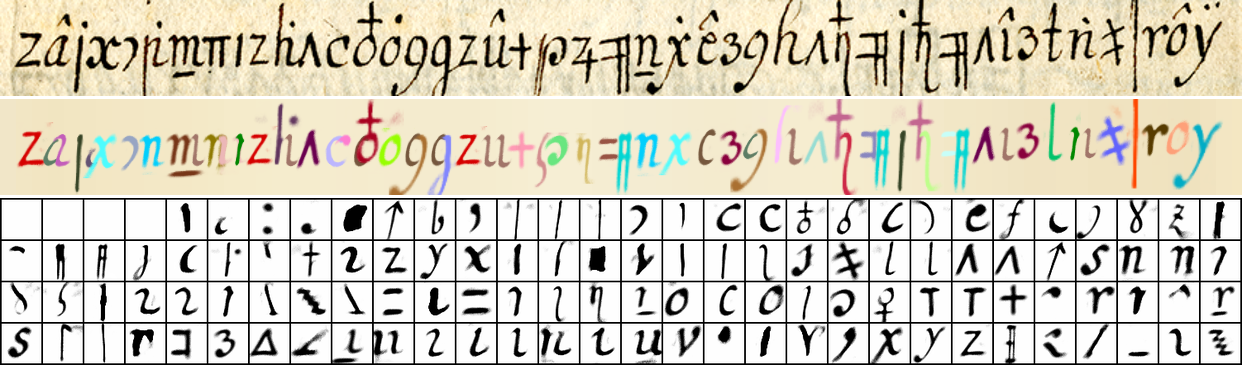

In [17]:
trainer = load_pretrained_model(path=UNSUP, device=None)
display(teaser(trainer, 3))

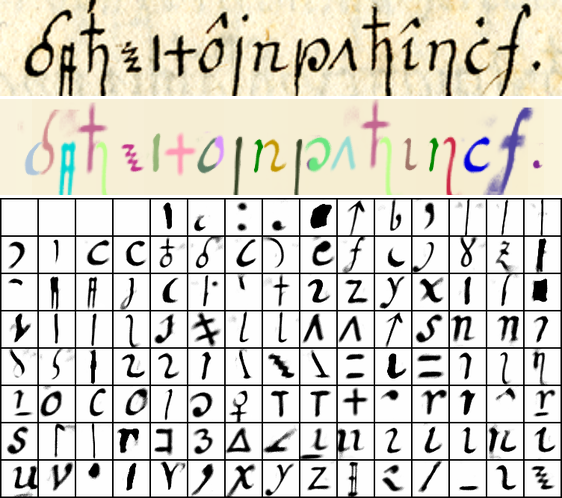

In [18]:
display(teaser(trainer, 10, n_row=8))

{'color': {'path': 'copiale/color', 'sep': ' ', 'space': '_', 'supervised': False, 'crop_width': 192}}
Generator is UNET
Selection init with dim_enc=64, dim_sprites=2304 --> dim_z=64
{'lr': 0.0001, 'weight_decay': 0}
Selection(
  (linear): Sequential(
    (0): Linear(in_features=2304, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
  (anchors): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
)


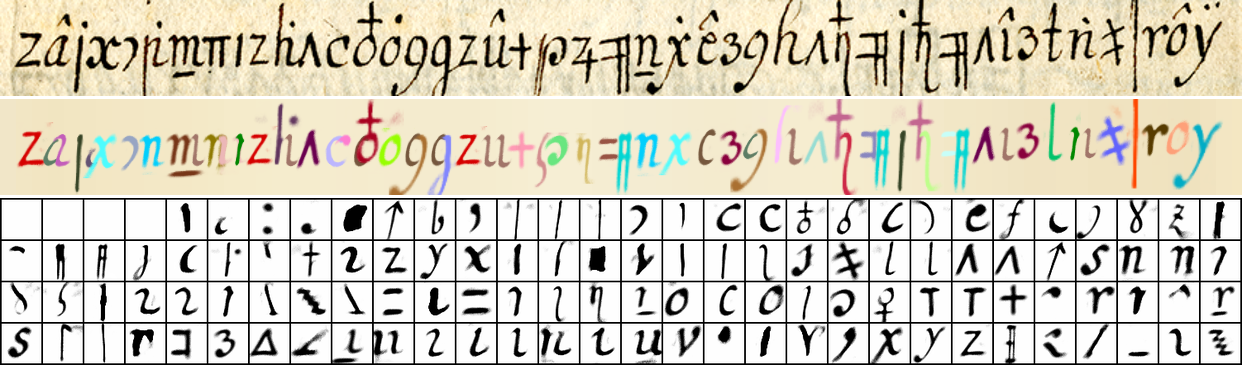

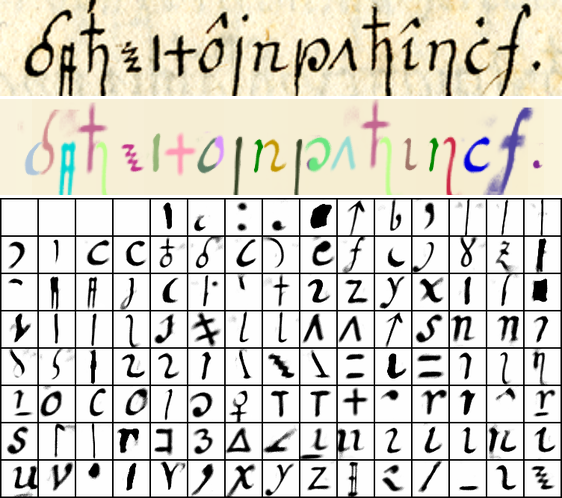

In [22]:
UNSUP = '/home/ysig/nicolas/learnable-typewriter-supervised/ablating-copiale-unsup-2/color/baseline/2022-11-11_22-35-32/'
trascribe_unsupervised = {0: 'z', 1: 'eh', 2: 'n.', 3: 'y..', 4: 'oh', 5: 'r.', 6: 'lam', 7: 'hd', 8: 'r.', 9: 'm', 10: 'c.', 11: 'inf', 12: 'uu', 13: 'c.', 14: 'iot', 15: '"', 16: '.', 17: 'grr', 18: 'nee', 19: 'nee', 20: 'n', 21: 'm.', 22: 'p', 23: 'uh', 24: 'ds', 25: 'tri', 26: 'bar', 27: 'mal', 28: 'grc', 29: 'nee', 30: 'ns', 31: 'b', 32: 'pi', 33: 'N', 34: 'v', 35: 'gs', 36: 'zs', 37: 'v', 38: 'iot', 39: 'grc', 40: 'p.', 41: '"', 42: 'k', 43: 'inf', 44: 'hd', 45: 'bar', 46: 'mu', 47: 'zs', 48: 'p', 49: 'B', 50: 'r.', 51: 'i', 52: 'u', 53: 'pi', 54: 'm.', 55: 'arr', 56: 'oh', 57: 'uu', 58: 'grr', 59: 'tri', 60: 'v', 61: 'uu', 62: 'n', 63: 's.', 64: 'b', 65: 'longs', 66: 'sqp', 67: ':', 68: 'c', 69: 'mal', 70: 'j', 71: 'bas', 72: 'l', 73: 'bar', 74: 'ni', 75: 'fem', 76: 'iot', 77: 'j', 78: 'ni', 79: 'nu', 80: 'oh', 81: 'del', 82: 'zzz', 83: 'sqi', 84: 'del', 85: 'ih', 86: 'zs', 87: 'ds', 88: 'g', 89: 'm', 90: 'l', 91: 'h.', 92: 'v', 93: 'iot', 94: 'f', 95: 'gam', 96: 'v', 97: '"', 98: 'zs', 99: 'x.', 100: 'three', 101: '"', 102: 'uu', 103: 'sqi', 104: 'r.', 105: 'ki', 106: 'zzz', 107: 'ns', 108: 'plus', 109: 'uh', 110: 'uh', 111: 'grl', 112: '"', 113: 'sqp', 114: 'lam', 115: 'ru', 116: 'ns', 117: 'iot', 118: 'ni', 119: 'gs'}
trainer = load_pretrained_model(path=UNSUP, device=None)
display(teaser(trainer, 3))
display(teaser(trainer, 10, n_row=8))

{'color': {'path': 'copiale/color', 'sep': ' ', 'space': '_', 'supervised': False, 'crop_width': 192}}
Generator is UNET
Selection init with dim_enc=64, dim_sprites=2304 --> dim_z=64
{'lr': 0.0001, 'weight_decay': 0}
Selection(
  (linear): Sequential(
    (0): Linear(in_features=2304, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
  (anchors): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=False)
  )
)


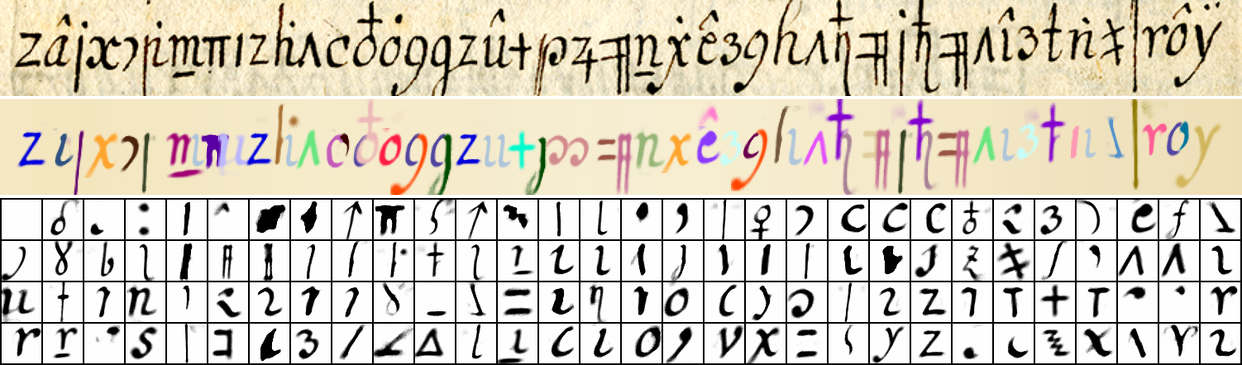

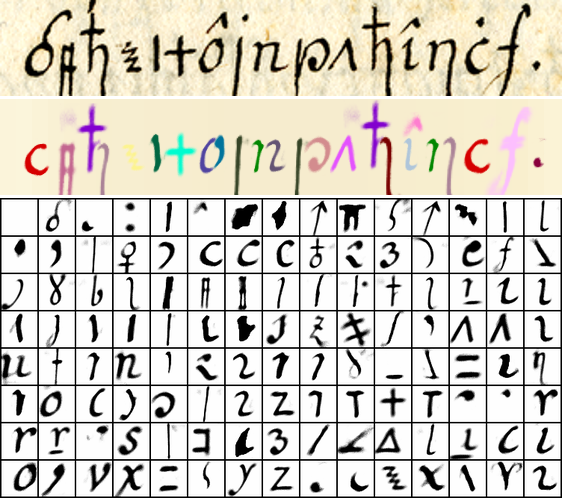

In [21]:
UNSUP = '/home/ysig/nicolas/learnable-typewriter-supervised/ablating-copiale-unsup-2/color/baseline-without-blank-pen/2022-11-11_22-35-01/'
trascribe_unsupervised = {0: 'c.', 1: 'eh', 2: 'm.', 3: 'uu', 4: 'mal', 5: 'M', 6: 'uu', 7: 'x.', 8: 'ki', 9: 'zzz', 10: 'z', 11: 'plus', 12: 'uh', 13: 'm', 14: 'm.', 15: 'tri', 16: 'p.', 17: 'grl', 18: 'r.', 19: 'zzz', 20: 'iot', 21: 'sqi', 22: 'arr', 23: 'del', 24: 'star', 25: 'pi', 26: 'lam', 27: 'y..', 28: 'arr', 29: 'ki', 30: 'k', 31: '"', 32: 'gam', 33: 'R', 34: 'zzz', 35: 'n', 36: 'fem', 37: 'lam', 38: 'f', 39: 'ns', 40: 'ru', 41: 'del', 42: 'lam', 43: 'uu', 44: 'grr', 45: 'grc', 46: 's.', 47: 'nee', 48: 'lam', 49: 'L', 50: 'nee', 51: 'uu', 52: 'tri', 53: 'b', 54: 'lam', 55: 'ds', 56: 'h', 57: 'iot', 58: ':', 59: 'zzz', 60: 'm', 61: 'ns', 62: 'pi', 63: 'sqp', 64: 'R', 65: 'bas', 66: 'v', 67: 'ih', 68: 'three', 69: 'p', 70: 'j', 71: 'no', 72: 'c.', 73: 'g', 74: 'del', 75: 'm.', 76: 'r.', 77: 'v', 78: 'p.', 79: 'b', 80: 'ru', 81: 'n.', 82: 'oh', 83: 'b', 84: 'r.', 85: 'r.', 86: 'zzz', 87: 'nee', 88: 'h.', 89: ':', 90: 'inf', 91: 'bar', 92: 'n', 93: 'b', 94: 'oh', 95: 'bas', 96: 'r.', 97: 'arr', 98: 'hd', 99: 'tri', 100: 'zs', 101: 'grr', 102: 'b', 103: 'hd', 104: 'grl', 105: 'arr', 106: 'ih', 107: 'gs', 108: 'iot', 109: 'c.', 110: '.', 111: 'j', 112: 'j', 113: 'oh', 114: 'y..', 115: 'zzz', 116: 'y..', 117: 'p', 118: 'ni', 119: 'ih'}
trainer = load_pretrained_model(path=UNSUP, device=None)
display(teaser(trainer, 3))
display(teaser(trainer, 10, n_row=8))